In [1]:
# Remover os warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar as ferramentas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# A função learning_curve retorna uma matriz com os resultados do cálculo da curva de aprendizado de um algoritmo.
# Os parâmetros necessários são:
# - Um estimador para ser treinado
# - As entradas (X) de treinamento
# - As saídas (y) de treinamento
# - O número - opcional - de pontos para avaliação do treinamento. São porcentagens do total de dados de treinamento.
# - A quantidade de 'folds' de validação cruzada (cv) - o padrão é 3.

from sklearn.model_selection import learning_curve


# A função plot_learning_curve desenha um gráfico com os dados da matriz.
def plot_learning_curve(estimator, X, y, cv=None):
    
    # O gráfico é inicializado com as características principais
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes, cv=cv)
    
    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [4]:
# A função validation_curve retorna uma matriz com os resultados dos scores de um algoritmo com a variação de
# algum dos parâmetros da instância.
# Os parâmetros necessários são:
# - Um estimador para ser treinado
# - As entradas (X) de treinamento
# - As saídas (y) de treinamento
# - O nome do parâmetro (p) que será variado
# - Uma lista de valores (p_range) que serão atribuídos ao parâmetro, a cada execução
# - A quantidade de 'folds' de validação cruzada (cv) - o padrão é 3.
# - Escala logarítmica para o eixo X (o padrão é True)

from sklearn.model_selection import validation_curve

# A função plot_validation_curve desenha um gráfico com os dados da matriz. É similar à plot_learning_curve.
def plot_validation_curve(estimator, X, y, p, p_range, cv=None, log=True):
    plt.figure()
    plt.title('Curva de Validação')
    plt.xlabel('Parâmetro')
    plt.ylabel('Desempenho')
    plt.grid()
    if log:
        plt.xscale('log')
    
    score_in, score_out = validation_curve(estimator, X, y, p, p_range, cv=cv)
    
    media_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    media_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    plt.plot(p_range, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(p_range, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(p_range, media_in - std_in, 
                     media_in + std_in, color='red', alpha=0.1)
    plt.fill_between(p_range, media_out - std_out, 
                     media_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [5]:
# Ler o CSV com os dados, fazer uma cópia de segurança e conferir o formato do dataset

all_data = pd.read_csv('HousePrices.csv')
backup = all_data.copy()
all_data.shape

(1460, 81)

In [6]:
# O método info() mostra 81 colunas no total. O arquivo data_description.txt traz o significado e os
# possíveis valores para cada uma das colunas.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# O método sample permite dar uma 'espiada' em algumas linhas do dataset

all_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
1315,1316,60,RL,85.0,11075,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,206900
566,567,60,RL,77.0,11198,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,325000
273,274,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,139000
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Abnorml,129000


In [8]:
# A única coluna que temos certeza que não deve fazer diferença para o preço final éo ID, 
# que será descartado.

all_data.drop('Id', axis=1, inplace=True)

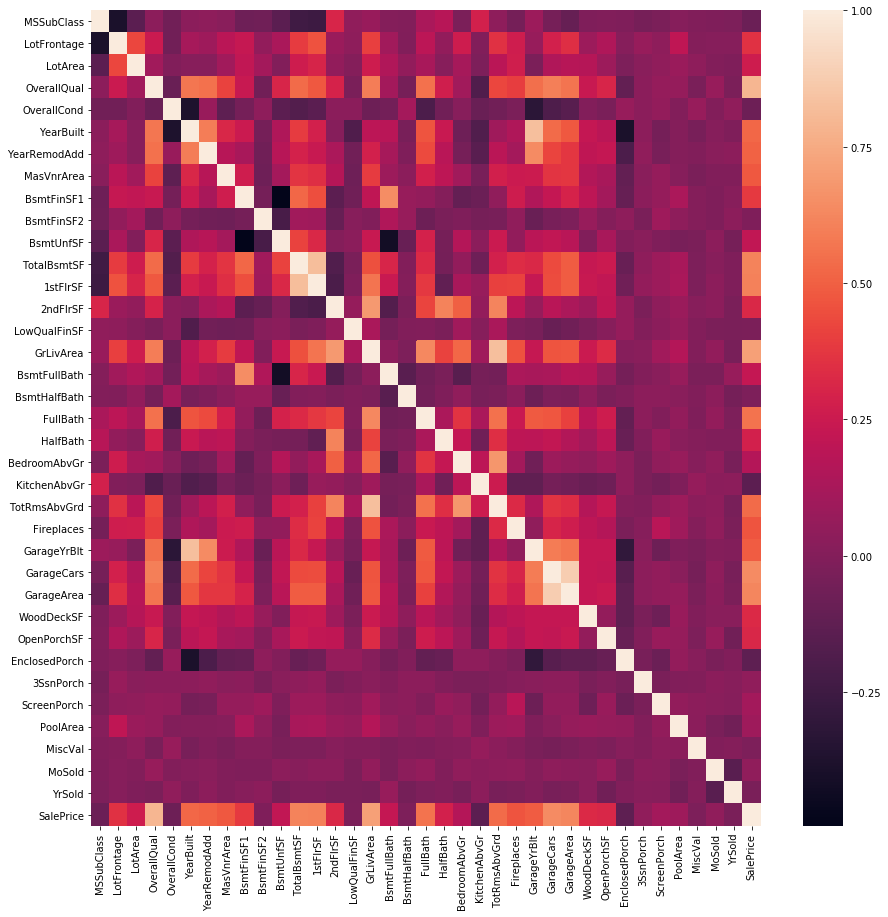

In [9]:
# Como a quantidade de colunas de entrada é grande e estamos trabalhando em um problema de regressão, vamos checar:
# - Quais variáveis tem uma alta correlação entre si, e
# - Quais tem a maior correlação com SalePrice, o valor a ser estimado

# O método corr() do pandas cria uma matriz de correlação entre as colunas. Usamos o Seaborn para
# desenhar um mapa de calor.

correlations = all_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlations)

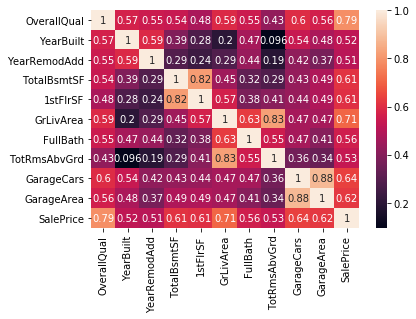

In [10]:
# Podemos simplificar a visualização das colunas que tem a maior correlação com SalePrice, mostrando
# inclusive os valores de correlação.

greater_correlation = correlations.index[abs(correlations['SalePrice']) > 0.5]
sns.heatmap(all_data[greater_correlation].corr(), annot=True)

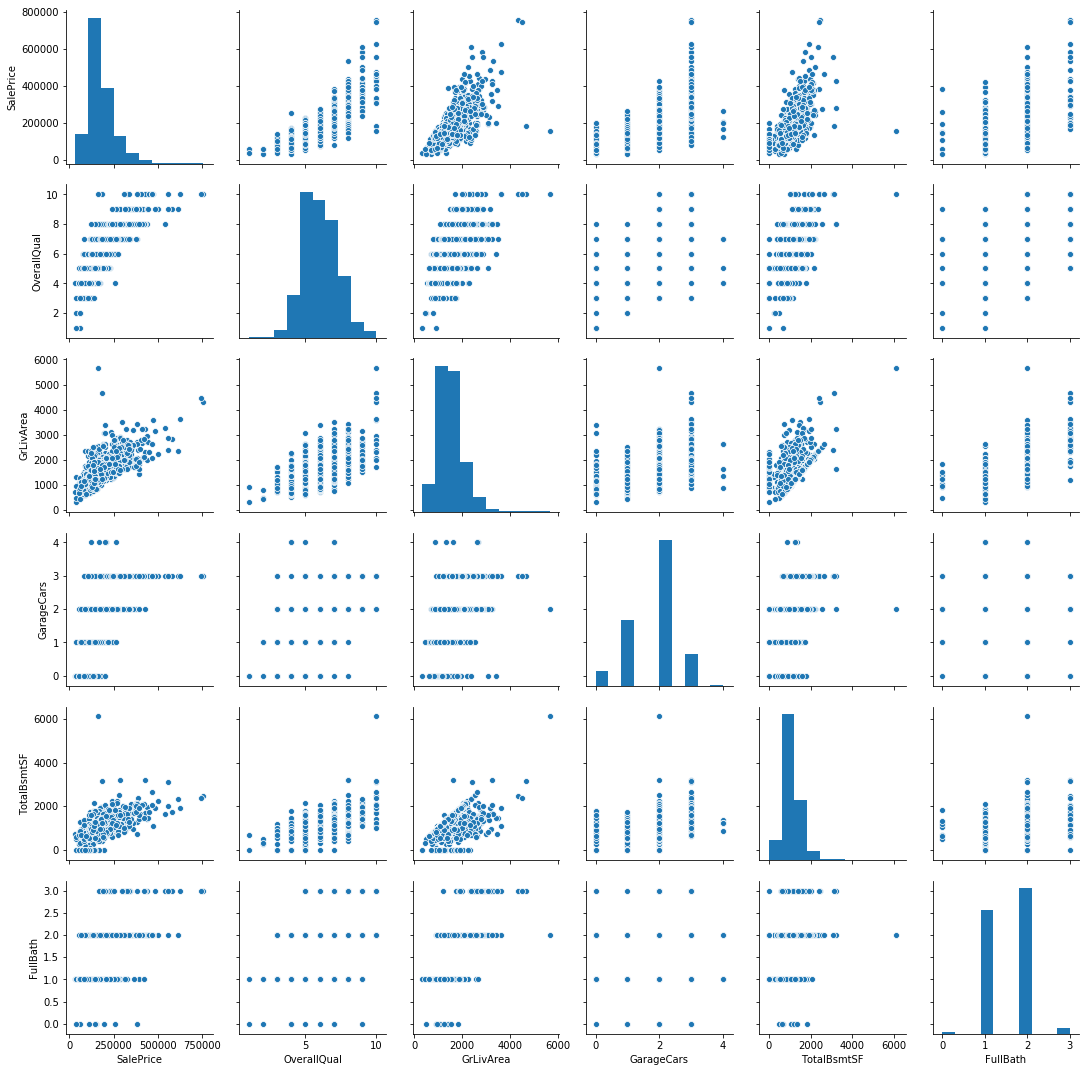

In [11]:
# Dentre elas, desconsiderando colunas que tem uma correlação alta entre si, destacamos as cinco maiores correlações
# com SalePrice para um pairplot. Nesse gráfico, podemos ver a distribuição de cada uma dessas variáveis, além de
# scatter plots comparando as colunas duas a duas.

main_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(all_data[main_features])

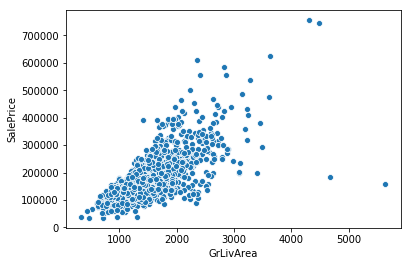

In [12]:
# A presença de outliers (pontos 'fora da curva') nas variáveis de maior correlação com o preço precisa ser
# revista. Eliminar os outliers nem sempre é uma boa ideia! Eles podem dar viés ao modelo para que se
# comporte melhor na presença de outliers nos dados de teste, não vistos no treinamento.

# No entanto, alguns deles podem e devem ser removidos, quando julgarmos que são prejudiciais. Vemos por exemplo
# que há duas casas com áreas bastante grandes que foram vendidas por preços muito baixos.

sns.scatterplot(all_data['GrLivArea'], all_data['SalePrice'])

In [13]:
# Como consideramos que isso seja uma anomalia, vamos remover os outliers.

all_data.drop(all_data[(all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 200000)].index, inplace=True)

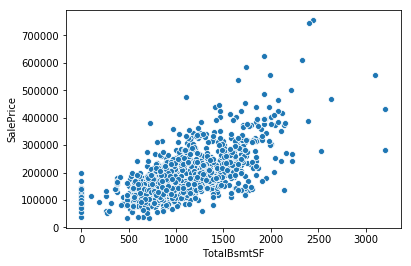

In [14]:
# O mesmo comportamento ocorre com uma casa com um porão bem grande vendida por um preço baixo. No entanto,
# esse outlier acaba de ser removido, e não precisamos nos preocupar com nenhum dos outros.

sns.scatterplot(all_data['TotalBsmtSF'], all_data['SalePrice'])

In [15]:
# Vistos os outliers, vamos nos preocupar com os dados ausentes. Vemos que várias características estão faltando.

all_data.isnull().sum().sort_values(ascending=False)

PoolQC           1452
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [16]:
# Aqui fica uma ideia de exercício: procure ler as características dos dados! Alguns deles podem ser preenchidos
# de forma inteligente. Por hora, vamos separar os dados numéricos e os categóricos. Como na maioria das categorias
# um valor null significa realmente que não se aplica àquela casa, preencheremos com 'Ausente'. Os valores numéricos
# ausentes se tornarão zero.

# Note que SalePrice não é uma variável de entrada, e está sendo desconsiderada por enquanto.
categorical_columns = all_data.select_dtypes(include=['object']).columns
numerical_columns = all_data.select_dtypes(exclude=['object']).columns
numerical_columns = numerical_columns.drop('SalePrice')

categorical_data = all_data[categorical_columns]
numerical_data = all_data[numerical_columns]

categorical_data.fillna('Ausente', inplace=True)
numerical_data.fillna(0, inplace=True)

In [17]:
# Aqui fica uma ideia de exercício: ao invés de aplicar uma técnica de normalização a todos os dados numéricos,
# verificar quais deles são assimétricos (e, portanto, deveriam ser transformados) - ver a documentação de scipy.skew,
# que é a função que calcula assimetria de uma distribuição.

# Aqui todos os dados numéricos estão sendo transformados, usando Box Cox.

from scipy.stats import boxcox

for column in numerical_data:
    numerical_data[column] = boxcox(numerical_data[column] + 1)[0]

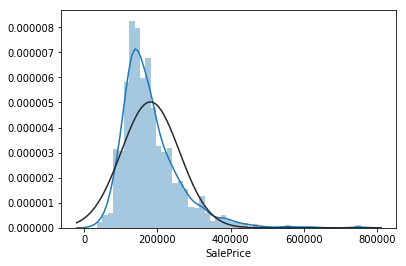

In [18]:
# A própria variável SalePrice é assimétrica e pode ser normalizada para melhorar o desempenho da
# regressão linear. A única diferença é que precisamos de um método de normalização que seja inversível, 
# ou seja, após prever um novo preço, precisaremos 'desnormalizar' para estimar o seu valor real.

# Observe a distribuição, a média e o desvio padrão.

from scipy.stats import norm

sns.distplot(all_data['SalePrice'], fit=norm)

In [19]:
mean, std = norm.fit(all_data['SalePrice'])
print(f'Média {mean} com desvio {std}')

Média 180932.91906721535 com desvio 79467.78892987774


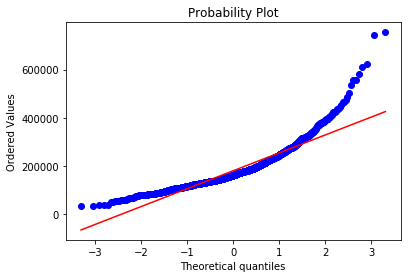

In [20]:
# A figura a seguir mostra a curva de probabilidade dos dados estarem normalizados.
# Quanto mais normal for a distribuição dos dados (média próxima da mediana, desvio padrão próximo de zero),
# mais linear será a distribuição de probabilidades.

from scipy.stats import probplot

plt.figure()
probplot(all_data['SalePrice'], plot=plt)
plt.show()

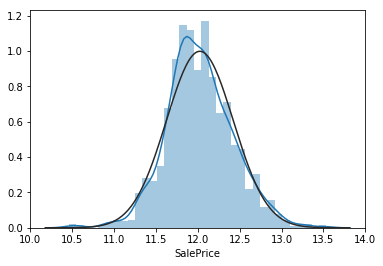

In [21]:
# Usamos os logaritmos dos valores para normalizá-los. Os gráficos e valores subsequentes mostram o resultado.

all_data['SalePrice'] = np.log1p(all_data['SalePrice'])
sns.distplot(all_data['SalePrice'], fit=norm)

In [22]:
mean, std = norm.fit(all_data['SalePrice'])
print(f'Média {mean} com desvio {std}')

Média 12.024015155682552 com desvio 0.3995757283645756


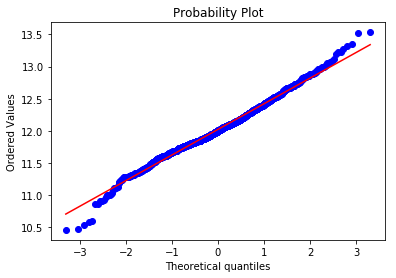

In [23]:
plt.figure()
probplot(all_data['SalePrice'], plot=plt)
plt.show()

In [24]:
# Já para as colunas categóricas, geramos as 'dummy variables'

categorical_data = pd.get_dummies(categorical_data)

In [25]:
# Juntamos agora, na matriz de features de entrada, as colunas numéricas e categóricas devidamente tratadas.
# O vetor de saída (y) será a coluna SalePrice, já normalizada também.

X = pd.concat([numerical_data, categorical_data], axis=1)
y = all_data['SalePrice']

In [26]:
# Usando a função train_test_split, podemos definir uma porcentagem dos dados que serão escolhidos
# aleatoriamente para compor o conjunto de teste.

# Todo o treinamento e validação serão realizados somente com as colunas de treinamento. O teste só pode
# ser usado na estimativa do E_out, após o treinamento do modelo.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Os scores dos algoritmos são dados automaticamente pela ferramenta, mas podemos definir uma função
# de erro personalizada, para verificação da performance.

# Utilizando a função cross_val_score, calcularemos o erro médio ao quadrado do modelo, validando em um K-Fold,
# e definiremos o erro como a raiz quadrada desse valor.

# Para os testes, calcularemos manualmente a média dos erros quadrados.

from sklearn.model_selection import cross_val_score

def rmse(estimator, X, y, testing=False):
    if testing:
        errors = []
        predictions = estimator.predict(X)
        for item in range(0, len(y)):
            error = predictions[item] - y[item]
            squared_error = error**2
            errors.append(squared_error)
        return np.sqrt(np.mean(errors))
    
    return np.sqrt(- cross_val_score(estimator, X, y, scoring='neg_mean_squared_error', cv=10))

In [28]:
# Importaremos quatro tipos de regressão linear:
# - Sem regularização
# - Com regularização por módulo (L1) - Lasso
# - Com regularização por quadrados (L2) - Ridge
# - Com regularização mista (L1 e L2) - ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

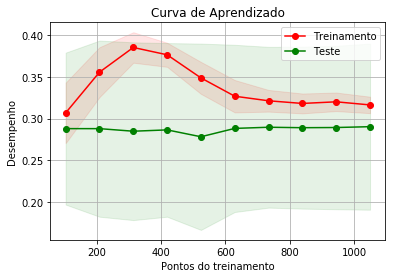

In [29]:
# Para a regressão linear sem regularização, basta instanciar o algoritmo e desenhar a curva de validação.

linear_regression = LinearRegression()
plot_learning_curve(linear_regression, X_train, y_train, cv=10)

In [30]:
# Podemos ver que o algoritmo é (mais ou menos...) estável, mas os resultados estão longe de serem os melhores
# (vistos os valores de média e desvio padrão da distribuição de SalePrice após normalização).
# Usando os dados do próprio treinamento, temos o cálculo do E_in do modelo para
# um cenário de validação cruzada.

scores = rmse(linear_regression, X_train, y_train)
print(np.mean(scores))
print(np.std(scores))

0.32672607241673224
0.022016069614205214


In [31]:
# Como o que nos interessa é estimar E_out, vamos treinar efetivamente a regressão e então
# usá-la para verificar se a expectativa de erro nos dados de teste é equivalente ao E_in calculado.

linear_regression.fit(X_train, y_train)
test_score = rmse(linear_regression, X_test, y_test.values, testing=True)
print(test_score)

0.3454937534058552


<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

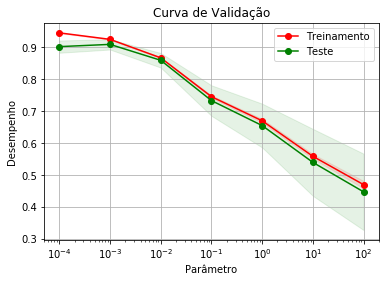

In [32]:
# Para usar modelos regularizados, precisamos de um valor para o parâmetro de regularização (alpha).
# Usando valores em uma faixa ampla, podemos ver como o modelo se comporta com a variação do
# parâmetro.

lasso = Lasso()
plot_validation_curve(lasso, X_train, y_train, 'alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=10)

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

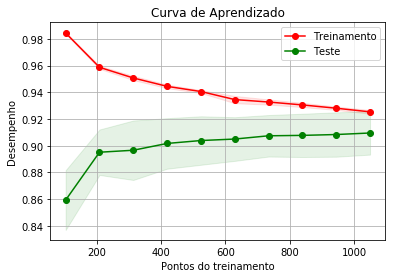

In [33]:
# O melhor valor para validação que não se afasta muito do score de treinamento é .
# Usando um parâmetro muito grande o modelo cai de desempenho, e um parâmetro menor pode levar a
# um erro de generalização maior. Vamos escolher o valor ideal a partir do gráfico e verificar a
# curva de aprendizado.

lasso = Lasso(alpha=0.001)
plot_learning_curve(lasso, X_train, y_train, cv=10)

In [34]:
# O modelo é bastante estável, a curva de aprendizado se aproxima de convergir para um score bom.
# O resultado do cálculo de E_in é:

scores = rmse(lasso, X_train, y_train)
print(np.mean(scores))
print(np.std(scores))

0.11705143755089598
0.014947849813919823


In [35]:
# A estimativa de E_out é razoável e aceitável para o modelo

lasso.fit(X_train, y_train)
test_score = rmse(lasso, X_test, y_test.values, testing=True)
print(test_score)

0.105177949240664


<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

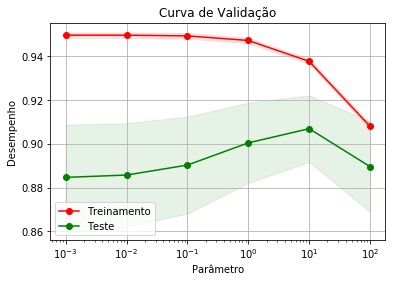

In [36]:
# Faremos o mesmo para uma regressão com regularização L2

ridge = Ridge()
plot_validation_curve(ridge, X_train, y_train, 'alpha', [0.001, 0.01, 0.1, 1, 10, 100], cv=10)

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

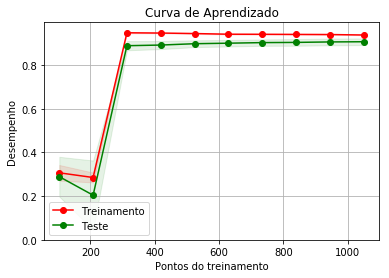

In [37]:
# O ponto ideal parece ser alpha = 10, visto que é o maior score de validação e se aproxima
# do score de treinamento.

# Em alguns casos, pode ser interessante variar o parâmetro nos arredores do maior resultado para
# um ajuste fino.

ridge = Ridge(alpha=10)
plot_learning_curve(ridge, X_train, y_train, cv=10)

In [38]:
# Vemos que a regularização mais pesada faz com que o modelo venha a convergir mais rápido.
# Vamos calcular E_in: o erro é similar ao Lasso

scores = rmse(ridge, X_train, y_train)
print(np.mean(scores))
print(np.std(scores))

0.11873333237009917
0.01383833218977093


In [39]:
# A estimativa de E_out também é razoável

ridge.fit(X_train, y_train)
test_score = rmse(ridge, X_test, y_test.values, testing=True)
print(test_score)

0.10407086180829275


L1 Ratio: 0.1


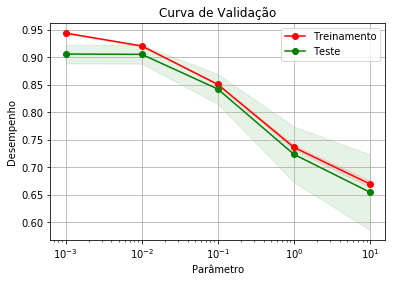

L1 Ratio: 0.3


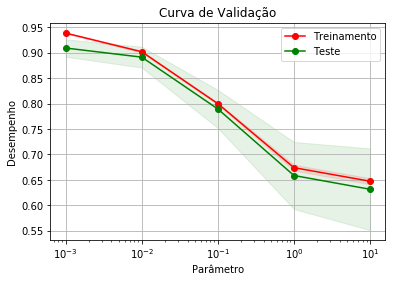

L1 Ratio: 0.5


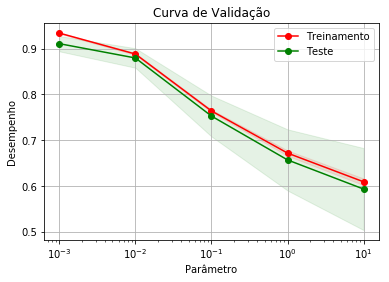

L1 Ratio: 0.7


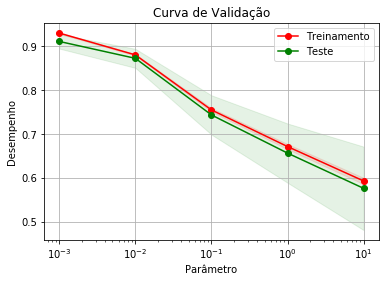

L1 Ratio: 0.9


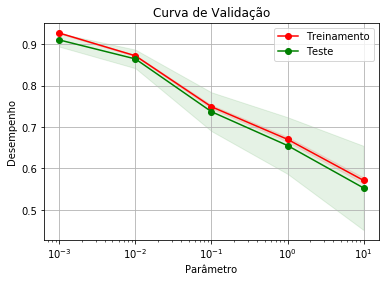

In [40]:
# O ElasticNet é um modelo que combina regularização L1 e L2.
# Podemos variar o alpha, que é o parâmetro de regularização, e o l1_ratio, que é a proporção
# que a regularização L1 terá em relação a L2.
# A penalidade aplicada é reg = a * L1 + b * L2, onde alpha = a+b e l1_ratio = a / (a + b)

# Vamos construir curvas de validação diferentes para alpha considerando diferentes pesos para L1:

for ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
    elastic_net = ElasticNet(l1_ratio=ratio)
    print(f'L1 Ratio: {ratio}')
    plot = plot_validation_curve(elastic_net, X_train, y_train, 'alpha', [0.001, 0.01, 0.1, 1, 10], cv=10)
    plot.show()

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

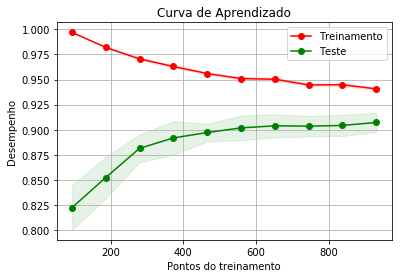

In [41]:
# Podemos ver que a razão de regularização L1 da ElasticNet fez pouca diferença nesse caso.
# Na escolha dos pontos, um alpha de 0.01 com l1_ratio de 0.01 nos dá score e generalização próximas do Lasso.
# Um alpha de 0.001 com l1_ratio de 0.5 dá o melhor score, mas com pequena perda de generalização.
# Devemos avaliar se é razoável pagar esse preço

elastic_net = ElasticNet(l1_ratio=0.3, alpha=0.001)
plot_learning_curve(elastic_net, X_train, y_train, cv=5)

In [42]:
# Vamos calcular E_in: conseguimos um score ligeiramente melhor

scores = rmse(elastic_net, X_train, y_train)
print(np.mean(scores))
print(np.std(scores))

0.11717403021909856
0.014686791651507344


In [43]:
# A estimativa de E_out é boa! Apesar da pequena perda, o modelo generaliza bem.
# Vamos adotar esse modelo.
# Como sugestão de exercício, criar um algoritmo que tire a média dos três modelos na hora de realizar uma predição.

elastic_net.fit(X_train, y_train)
test_score = rmse(elastic_net, X_test, y_test.values, testing=True)
print(test_score)

0.1028974845419897


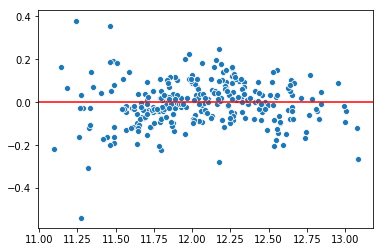

In [44]:
# Vamos criar um scatter plot dos resíduos da regressão.
# Resíduo é a diferença entre a predição do modelo e o valor de teste.
# A análise dos resíduos nos mostra como e quanto o modelo erra.

# O problema parece passível de melhora do ponto de vista de regressão linear, visto que
# - o resíduo é distribuido aleatoriamente ao redor da linha y=0
# - não parece haver padrão na distribuição dos pontos
# - Parece haver tantos erros para mais quanto para menos
# Esses são sinais de que a regressão linear está se ajustando bem aos dados.

predictions = elastic_net.predict(X_test)
plt.figure()
plt.axhline(color='red')
sns.scatterplot(predictions, predictions - y_test.values)

In [45]:
# Para dar um exemplo de como o problema funcionaria para prever um valor real, vamos treiná-lo com todo o conjunto
# de dados, deixando apenas um ponto para trás. Aqui, separamos o ponto n. 102.

# É importante lembrar que o X usado aqui já passou por todas as transformações necessárias para que
# se adaptasse ao modelo. Um 'novo dado' deveria passar pelo mesmo tratamento.

chosen_point = np.random.randint(0, 1460)

single_point = X.loc[X.index == chosen_point]
single_point_price = y.loc[y.index == chosen_point]

X_train_all = X.loc[X.index != chosen_point]
y_train_all = y.loc[y.index != chosen_point]

In [46]:
# Treinamos o modelo

elastic_net.fit(X_train_all, y_train_all)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
# Como normalizamos o SalePrice, vamos usar a função inversa de log1p (que é expm1) para chegar aos valores reais

price = elastic_net.predict(single_point)
print(f'Adivinhamos um valor {np.expm1(price[0])} para uma casa de {np.expm1(single_point_price.values[0])}')

Adivinhamos um valor 258318.61181110333 para uma casa de 270000.00000000006
